In [63]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from random import choice

In [64]:
from differential_evolution import differential_evolution
from AuxFunctions import show_image, load_image, add_circle, show_fitness, filename_from_path

# Approximating Images with circles using Differential Evolution Algorithms


#### Preprocesing the image to approximate before the algorithm

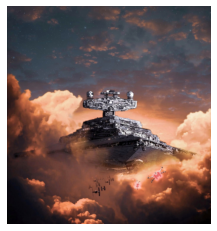

(403, 377, 3)


In [105]:
path = '../Images/space_cruiser.jpg'
target = load_image(path, size=(377,403))
#target = load_image('../Images/arbol.png', size=(64,64))
show_image(target)
print(target.shape)

Creating the image that will be the canvas for the circles to plot

In [106]:
phenotype = np.zeros(shape=target.shape)
phenotype.fill(255)

#### Differential Algorithms Input Functions

Objective Function for the algorithm to score the genes

In [107]:
def objective_function(P):
    global target
    global phenotype
    
    new_phenotype = add_circle(phenotype, P)

    max_error = (np.square((1 - (target >= 127)) * 255 - target)).mean(axis=None)
    fit = (np.square(new_phenotype - target)).mean(axis=None)
    fit = (max_error - fit) / max_error
        
    return 1 - fit

Callback function that will be called when a elite gene is found

In [112]:
def callback(P, g):
    global phenotype
    phenotype = add_circle(phenotype, P)
    '''
    clear_output(wait=True)
    dir = '../Images/Outputs/' + filename_from_path(path) + '/'
    exists = os.path.exists(dir)

    if not exists:
        os.makedirs(dir)
    n = str(g) if g >= 10 else '0' + str(g)
    name = dir + filename_from_path(path) + '_gen_' + n + '.png'

    plt.figure(figsize=(5,5))
    plt.axis("off")
    #plt.imsave(name, phenotype / 255)
    plt.imshow(phenotype / 255)
    plt.savefig(name)
    '''
    
    #'../Images/Outputs/' + filename_from_path(path) + '_circle_approx.png'
    #show_image(phenotype)

Bounds of the genotype genes (X and Y position, r Radius, R,G,B intensity and a Alpha)

In [109]:
bounds = [
    [0,1],                      # 1 X position
    [0,1],                      # 2 Y position
    [0,1],                      # 3 Radius
    [0,1],                      # 4 Red
    [0,1],                      # 5 Green
    [0,1],                      # 6 Blue
    [0,1]                       # 7 Alpha
]

In [110]:
def approximate_image(func, bounds, args=(), popsize=100, niter=1000, callback=None, iterations=None, save=False, path=None):

    if iterations == None:
        phenotype.fill(255)
        differential_evolution(func, bounds, args, popsize, niter, callback=callback)
        img_res = np.copy(phenotype)
        show_fitness(target, [[img_res, 1000]], save=save, path=path)
        return [img_res, 1000]
    else:
        outputs = []
        for iter in iterations:
            phenotype.fill(255)
            differential_evolution(func, bounds, args, popsize, niter=iter, callback=callback)
            outputs.append([np.copy(phenotype), iter])
        
        show_fitness(target, outputs, save=save, path=path)
        return outputs

In [113]:
res = approximate_image(
        func=objective_function,
        bounds=bounds,
        callback=callback,
        #popsize=1,
        iterations=[10000],
)

DIFFERENTIAL EVOLUTION, 10000 GENS, 100 POPULATION, 7 GENES
GEN 20, FIT 0.28179965


KeyboardInterrupt: 

In [ ]:
import imageio

dir = '../Images/Outputs/arbol/'
filenames = sorted(os.listdir('../Images/Outputs/space_cruiser/'))

images = []
for filename in filenames:
    images.append(imageio.imread(dir + filename))
for _ in range(10):
    images.append(imageio.imread(dir + filenames[-1]))
    
imageio.mimsave('../Images/Outputs/' + 'space_cruiser.gif', images)